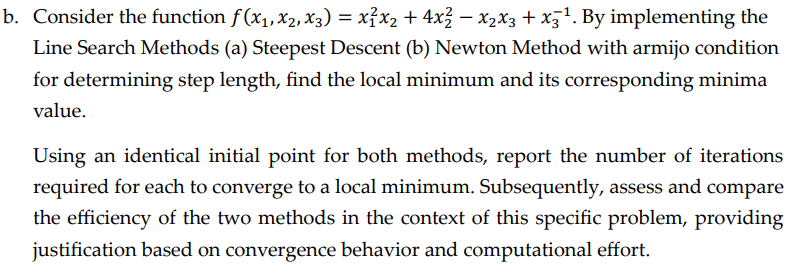

Definition Function Line Search Method
- Where to move: Steepest Descent dan Newton's Method
- How far to move: armijo + backtracking

In [195]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Define the function of three variables
def func(x):
    # return x[0]**2 * x[1] + 4 * x[1]**2 - x[1] * x[2] + 1 / (x[2])
    return x[0]**2 + 2*x[1]**2 + 3*x[2]**2 - 2*x[0] - 4*x[1] - 6*x[2] + 10

In [196]:
# Numerical gradient using central difference
def numerical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.copy(x)
        x_backward = np.copy(x)
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(x_forward) - f(x_backward)) / (2 * h)
    return grad

# Backtracking line search with Armijo condition
def backtracking_line_search(f, x, p, grad, alpha=1.0, rho=0.5, mu1=1e-4, max_backtrack=20):
    fx = f(x)
    grad_p = grad @ p  # Precompute dot product
    for _ in range(max_backtrack):
        if f(x + alpha*p) <= fx + mu1 * alpha * grad_p:
            return alpha
        alpha *= rho
    return alpha  # Return alpha terakhir jika max_backtrack tercapai

# Steepest descent optimization
def steepest_descent(f, x0, tol=1e-6, max_iter=20, mu1=1e-4, rho=0.5):
    x = np.asarray(x0, dtype=float)
    assert x.ndim == 1, "x0 harus vektor 1D"
    path = [x.copy()]
    for k in range(max_iter):
        grad = numerical_gradient(f, x)
        if np.linalg.norm(grad) < tol:
            print(f"Konvergensi tercapai pada iterasi {k}.")
            break   
        p = -grad
        alpha = backtracking_line_search(f, x, p, grad, mu1=mu1, rho=rho)
        x = x + alpha * p
        path.append(x.copy())
    else:
        print("Peringatan: Maksimum iterasi tercapai tanpa konvergensi.")
    return x, path, alpha, grad

# Numerical Hessian using central difference
def numerical_hessian(f, x, h=1e-5):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            x_ijpp = np.copy(x)
            x_ijpm = np.copy(x)
            x_ijmp = np.copy(x)
            x_ijmm = np.copy(x)
            x_ijpp[i] += h
            x_ijpp[j] += h
            x_ijpm[i] += h
            x_ijpm[j] -= h
            x_ijmp[i] -= h
            x_ijmp[j] += h
            x_ijmm[i] -= h
            x_ijmm[j] -= h
            hessian[i, j] = (f(x_ijpp) - f(x_ijpm) - f(x_ijmp) + f(x_ijmm)) / (4 * h**2)
    return hessian

def newton_method(f, x0, tol=1e-6, max_iter=20, mu1=1e-4, rho=0.5, h_hessian=1e-5):
    x = np.asarray(x0, dtype=float)
    assert x.ndim == 1, "x0 harus vektor 1D"
    path = [x.copy()]
    for k in range(max_iter):
        grad = numerical_gradient(f, x)
        if np.linalg.norm(grad) < tol:
            print(f"Konvergensi tercapai pada iterasi {k}.")
            break 
        hessian = numerical_hessian(f, x, h=h_hessian)
        hessian += 1e-6 * np.eye(len(x)) * np.linalg.norm(hessian)  # Regularisasi adaptif
        try:
            p = -np.linalg.solve(hessian, grad)
        except np.linalg.LinAlgError:
            print("Peringatan: Hessian singular, fallback ke steepest descent.")
            p = -grad  
        alpha = backtracking_line_search(f, x, p, grad, mu1=mu1, rho=rho)
        x = x + alpha * p
        path.append(x.copy())
    else:
        print("Peringatan: Maksimum iterasi tercapai tanpa konvergensi.")
    return x, path

In [197]:
# Initialize the function and starting point
# x0 = np.array([1, 1, 1])
x0 = np.array([2, 1, 1])

print("\n" + "="*50 + "\n")

print("Metode Steepest Descent")
xmin, path, alpa, grad = steepest_descent(func, x0)
path = np.array(path)

print(f"Local minimum point: {xmin}")
print(f"Local minimum value: {func(xmin)}")
print(f"Gradient norm at the local minimum: {np.linalg.norm(numerical_gradient(func, xmin))}")
# print alpha values
alpha_values = [backtracking_line_search(func, path[i], -numerical_gradient(func, path[i]), numerical_gradient(func, path[i])) for i in range(len(path)-1)]
print(f"Total iterations: {len(path) - 1}")
for i, point in enumerate(path[-20:], start=len(path) - 20):
    alpha = backtracking_line_search(func, point, -numerical_gradient(func, point), numerical_gradient(func, point))
    grad_norm = np.linalg.norm(numerical_gradient(func, point))
    # print alpha, x1, x2, x3, fx and gradient norm
    print(f"Iteration ke {i}|x1 = {point[0]:<15.6f}|x2 = {point[1]:<15.6f}|x3 = {point[2]:<15.6f}|fx = {func(point):<15.6f}|Alpha = {alpha}|Grad norm = {grad_norm:<15.6e}")

print("\n" + "="*50 + "\n")

# Run optimization using Newton's Method
print("Metode Newton's Method")
xmin_newton, path_newton = newton_method(func, x0)
path_newton = np.array(path_newton)

print(f"Local minimum point: {xmin_newton}")
print(f"Local minimum value: {func(xmin_newton)}")
print(f"Gradient norm at the local minimum: {np.linalg.norm(numerical_gradient(func, xmin_newton))}")
# print alpha values
alpha_values_newton = [backtracking_line_search(func, path_newton[i], -numerical_gradient(func, path_newton[i]), numerical_gradient(func, path_newton[i])) for i in range(len(path_newton)-1)]
for i, point in enumerate(path_newton[-20:], start=len(path_newton) - 20):
    alpha = backtracking_line_search(func, point, -numerical_gradient(func, point), numerical_gradient(func, point))
    grad_norm = np.linalg.norm(numerical_gradient(func, point))
    print(f"Iteration ke {i}|x1 = {point[0]:<15.6f}|x2 = {point[1]:<15.6f}|x3 = {point[2]:<15.6f}|fx = {func(point):<15.6f}|Alpha = {alpha}|Grad norm = {grad_norm:<15.6e}")

print("\n" + "="*50 + "\n")




Metode Steepest Descent
Konvergensi tercapai pada iterasi 1.
Local minimum point: [1. 1. 1.]
Local minimum value: 4.0
Gradient norm at the local minimum: 1.4043333874306803e-10
Total iterations: 1
Iteration ke -18|x1 = 2.000000       |x2 = 1.000000       |x3 = 1.000000       |fx = 5.000000       |Alpha = 0.5|Grad norm = 2.000000e+00   
Iteration ke -17|x1 = 1.000000       |x2 = 1.000000       |x3 = 1.000000       |fx = 4.000000       |Alpha = 1.0|Grad norm = 1.404333e-10   


Metode Newton's Method
Konvergensi tercapai pada iterasi 2.
Local minimum point: [1. 1. 1.]
Local minimum value: 4.0
Gradient norm at the local minimum: 1.4043333874306803e-10
Iteration ke -17|x1 = 2.000000       |x2 = 1.000000       |x3 = 1.000000       |fx = 5.000000       |Alpha = 0.5|Grad norm = 2.000000e+00   
Iteration ke -16|x1 = 1.000004       |x2 = 1.000000       |x3 = 1.000000       |fx = 4.000000       |Alpha = 0.5|Grad norm = 7.648771e-06   
Iteration ke -15|x1 = 1.000000       |x2 = 1.000000       |

Plot Countur
1. Steepest Descent
2. Newton Method


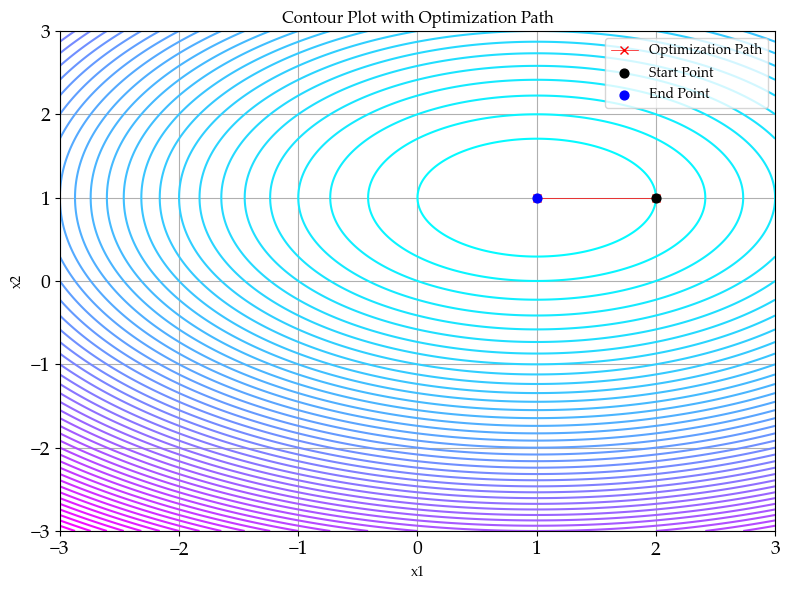

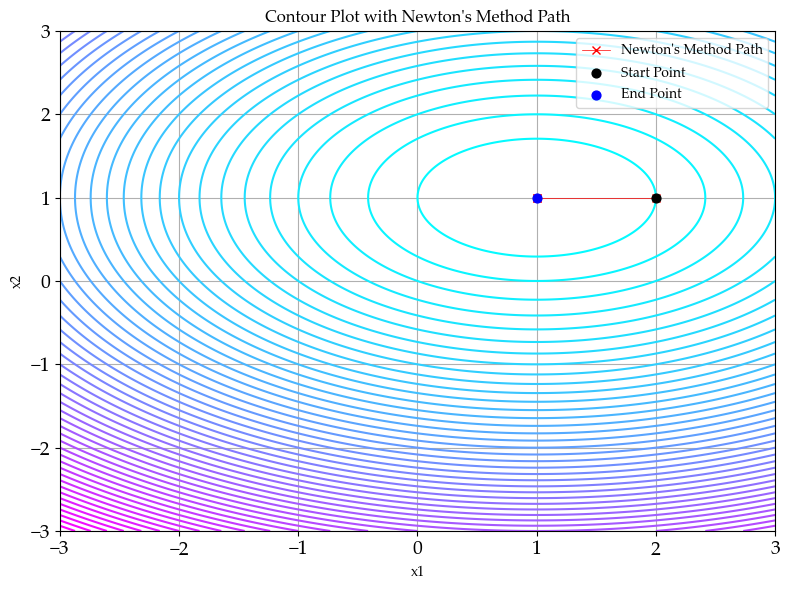

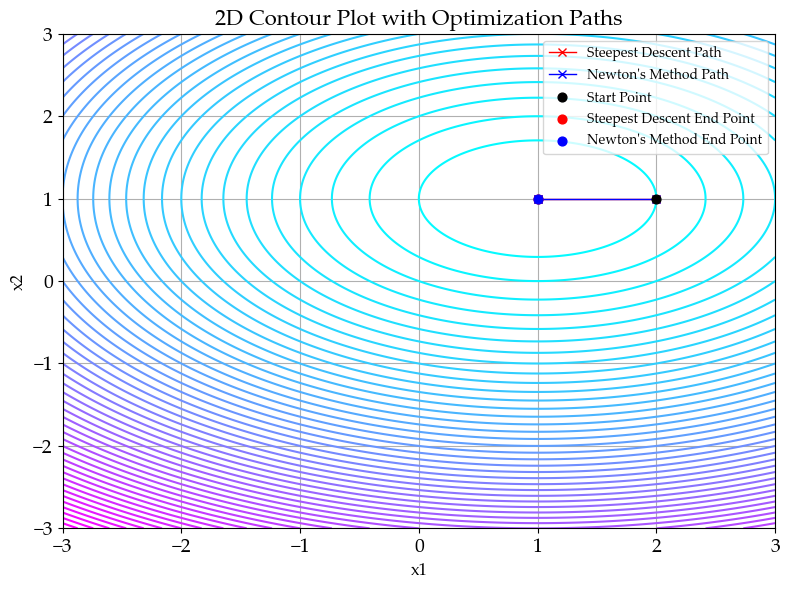

In [198]:
# Create contour plot
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = func([X, Y, 1])

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, Z, levels=50, cmap='cool')
ax.plot(path[:, 0], path[:, 1], marker='x', color='red', linewidth=0.5, label='Optimization Path')
# Add the start point
ax.scatter(x0[0], x0[1], color='black', s=40, label='Start Point', zorder=5)
# Add the end point
ax.scatter(path[-1, 0], path[-1, 1], color='blue', s=40, label='End Point', zorder=5)
ax.set_title("Contour Plot with Optimization Path")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

# Create contour plot for Newton's Method
fig, ax_newton = plt.subplots(figsize=(8, 6))
CS_newton = ax_newton.contour(X, Y, Z, levels=50, cmap='cool')
ax_newton.plot(path_newton[:, 0], path_newton[:, 1], marker='x', color='red', linewidth=0.5, label="Newton's Method Path")

# Add the start point
ax_newton.scatter(x0[0], x0[1], color='black', s=40, label='Start Point', zorder=5)
# Add the end point
ax_newton.scatter(path_newton[-1, 0], path_newton[-1, 1], color='blue', s=40, label="End Point", zorder=5)

ax_newton.set_title("Contour Plot with Newton's Method Path")
ax_newton.set_xlabel('x1')
ax_newton.set_ylabel('x2')
ax_newton.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

# Create a 2D contour plot with optimization paths
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the contour
CS = ax.contour(X, Y, Z, levels=50, cmap='cool')

# Plot the optimization path for Steepest Descent
ax.plot(path[:, 0], path[:, 1], marker='x', color='red', linewidth=1, label='Steepest Descent Path')

# Plot the optimization path for Newton's Method
ax.plot(path_newton[:, 0], path_newton[:, 1], marker='x', color='blue', linewidth=1, label="Newton's Method Path")

# Add the start point
ax.scatter(x0[0], x0[1], color='black', s=40, label='Start Point', zorder=5)

# Add the end points
ax.scatter(path[-1, 0], path[-1, 1], color='red', s=40, label='Steepest Descent End Point', zorder=5)
ax.scatter(path_newton[-1, 0], path_newton[-1, 1], color='blue', s=40, label="Newton's Method End Point", zorder=5)

# Add labels, title, and legend
ax.set_title("2D Contour Plot with Optimization Paths", fontsize=16)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



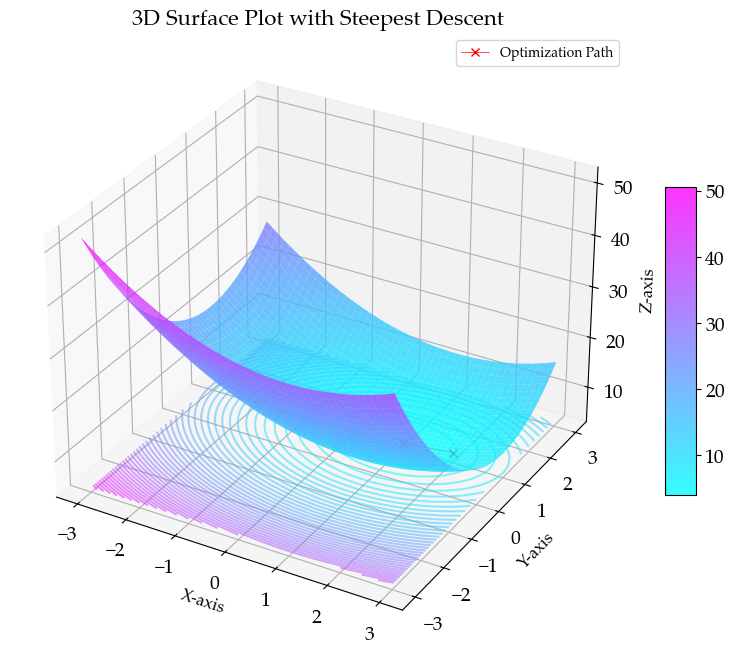

In [199]:

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='cool', edgecolor='none', alpha=0.8)

# Plot the contour lines
contour = ax.contour(X, Y, Z, zdir='z', offset=np.min(Z), levels=50, cmap='cool', alpha=0.5)

# Calculate the function values for the optimization path
z_path = [func(point) for point in path]

# Plot the optimization path in 3D
ax.plot(path[:, 0], path[:, 1], z_path, color='red', marker='x', linewidth=0.5, label='Optimization Path')

# Add labels and title
ax.set_title("3D Surface Plot with Steepest Descent", fontsize=16)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('Z-axis', fontsize=12)

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# Add legend
ax.legend()
plt.show()


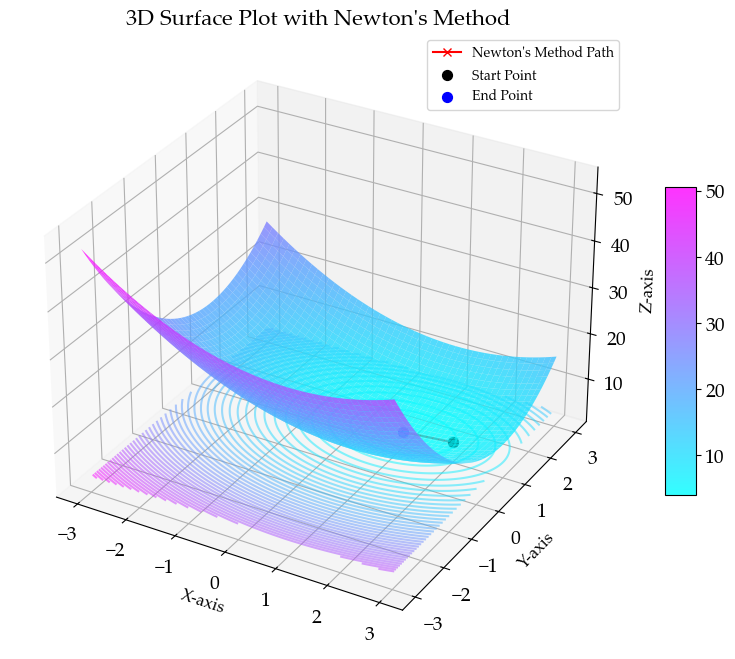

In [200]:
# Calculate the function values for the Newton's Method optimization path
z_path_newton = [func(point) for point in path_newton]

# Plot the optimization path for Newton's Method in 3D
fig_newton = plt.figure(figsize=(10, 8))
ax_newton_3d = fig_newton.add_subplot(111, projection='3d')

# Plot the surface
surf_newton = ax_newton_3d.plot_surface(X, Y, Z, cmap='cool', edgecolor='none', alpha=0.8)


# Plot the contour lines
contour_newton = ax_newton_3d.contour(X, Y, Z, zdir='z', offset=np.min(Z), levels=50, cmap='cool', alpha=0.5)

# Plot the optimization path in 3D
ax_newton_3d.plot(path_newton[:, 0], path_newton[:, 1], z_path_newton, color='red', marker='x', label="Newton's Method Path")

# Add labels and title
ax_newton_3d.set_title("3D Surface Plot with Newton's Method", fontsize=16)
ax_newton_3d.set_xlabel('X-axis', fontsize=12)
ax_newton_3d.set_ylabel('Y-axis', fontsize=12)
ax_newton_3d.set_zlabel('Z-axis', fontsize=12)

# Add the start point
ax_newton_3d.scatter(x0[0], x0[1], func(x0), color='black', s=50, label='Start Point', zorder=5)

# Add the end point
ax_newton_3d.scatter(path_newton[-1, 0], path_newton[-1, 1], z_path_newton[-1], color='blue', s=50, label="End Point", zorder=5)

# Add a color bar
fig_newton.colorbar(surf_newton, ax=ax_newton_3d, shrink=0.5, aspect=10)

# Add legend
ax_newton_3d.legend()

plt.show()

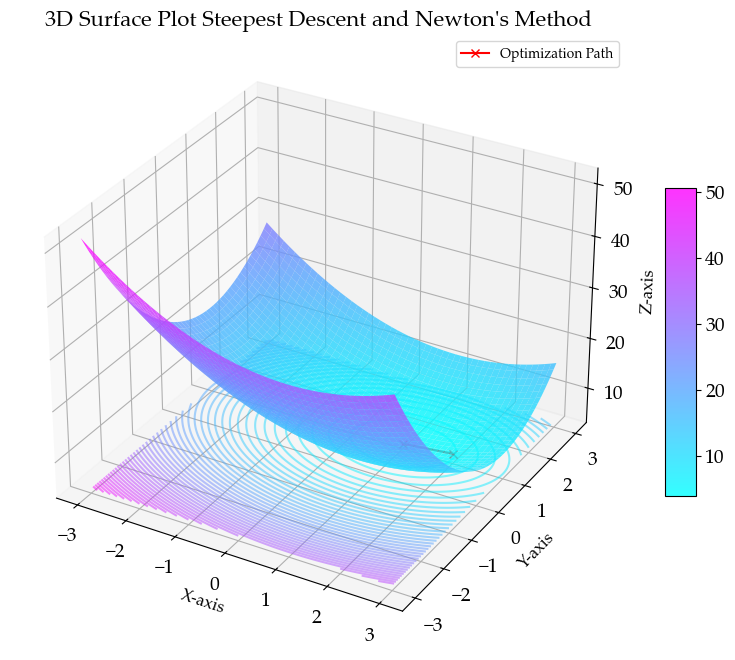

In [201]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='cool', edgecolor='none', alpha=0.8)

# Plot the contour lines
contour = ax.contour(X, Y, Z, zdir='z', offset=np.min(Z), levels=50, cmap='cool', alpha=0.5)
# Calculate the function values for the optimization path
z_path = [func(point) for point in path]
# Plot the optimization path in 3D
ax.plot(path[:, 0], path[:, 1], z_path, color='red', marker='x', label='Optimization Path')
# Add labels and title
ax.set_title("3D Surface Plot Steepest Descent and Newton's Method", fontsize=16)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('Z-axis', fontsize=12)
# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# Add legend
ax.legend()
plt.show()



In [202]:
import numpy as np
from itertools import product

# Definisi fungsi
def f(x1, x2, x3):
    return x1**2 * x2 + 4 * x2**2 - x2 * x3 + (1 / x3)

# Rentang nilai untuk grid
x1_values = [-2, -1, 0, 1, 2]
x2_values = [-1, 0, 1]
x3_values = [-1, -0.5, 0.5, 1]

# Grid Search
min_value = np.inf
best_point = None

for x1, x2, x3 in product(x1_values, x2_values, x3_values):
    try:
        current_value = f(x1, x2, x3)
        if current_value < min_value:
            min_value = current_value
            best_point = (x1, x2, x3)
    except ZeroDivisionError:
        continue

print("Initial point terbaik (minimisasi):", best_point)
print("Nilai fungsi:", min_value)

Initial point terbaik (minimisasi): (-2, -1, -0.5)
Nilai fungsi: -2.5
